In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from math import sqrt
import statsmodels.stats.api as sms
from IPython.display import display, Math, Latex
import matplotlib.pyplot as plt
%matplotlib inline

#set the style we wish to use for our plots
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings('ignore')

In [49]:
df1 = pd.read_csv('./Results/glove_1M_full_dates_hour_rolling_mean_high', index_col = 0)
df2 = pd.read_csv('./Results/glove_1M_full_dates_hour_rolling_mean_low', index_col = 0)

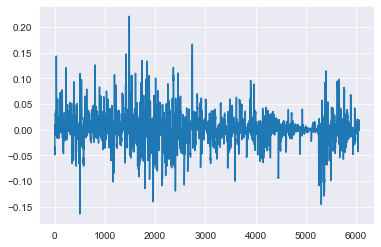

In [54]:
plt.plot(df2['profit'].values)

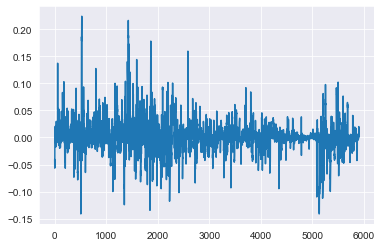

In [53]:
plt.plot(df1['profit'].values)

In [39]:
# high = np.random.normal(2,1,1000) / 100
# low = np.random.normal(0,1,1000) / 100

df1 = pd.DataFrame({'high':df1['profit'], 'low':df2['profit']})
df1 = df1[df1.index<5878]
df2 = df1.melt(value_vars=['high', 'low'], var_name='bucket', value_name='returns')

In [40]:
# high = np.random.normal(2,1,1000) / 100
# low = np.random.normal(0,1,1000) / 100

# df1 = pd.DataFrame({'high':high, 'low':low})
# df2 = df1.melt(value_vars=['high', 'low'], var_name='bucket', value_name='returns')

In [41]:
description = df1.describe()

iqr = pd.DataFrame(description.loc['75%'] - description.loc['25%'],columns=["IQR"]).transpose()
# description = description.append(iqr)

rnge = pd.DataFrame(description.loc['max'] - description.loc['min'],columns=["range"]).transpose()
# # description = description.append(rnge)

median = pd.DataFrame(df1.median(),columns=["median"]).transpose()

description = description.append([iqr,rnge,median])

description

,high,low
count,5878.000000,5878.000000
mean,0.002058,0.001456
std,0.030786,0.031439
min,-0.141315,-0.164212
25%,-0.008670,-0.010391
50%,0.000787,0.000557
75%,0.012434,0.012930
max,0.223998,0.220600
IQR,0.021104,0.023321
range,0.365313,0.384812


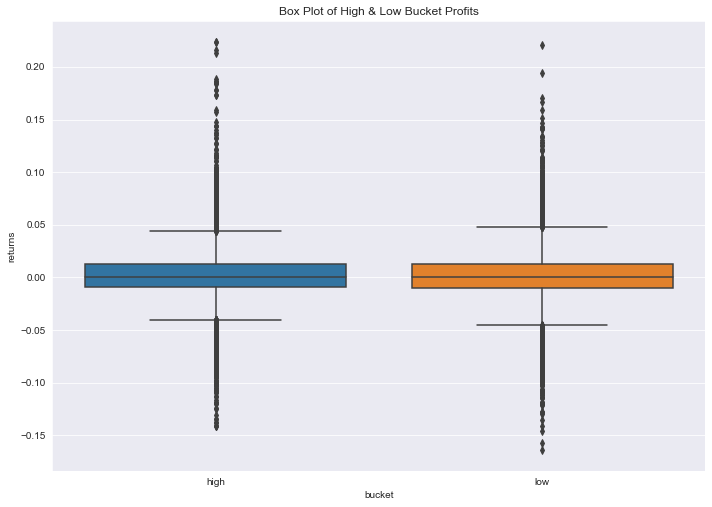

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.boxplot(x="bucket",y="returns",data=df2)
ax.set_title('Box Plot of High & Low Bucket Profits')
plt.show()

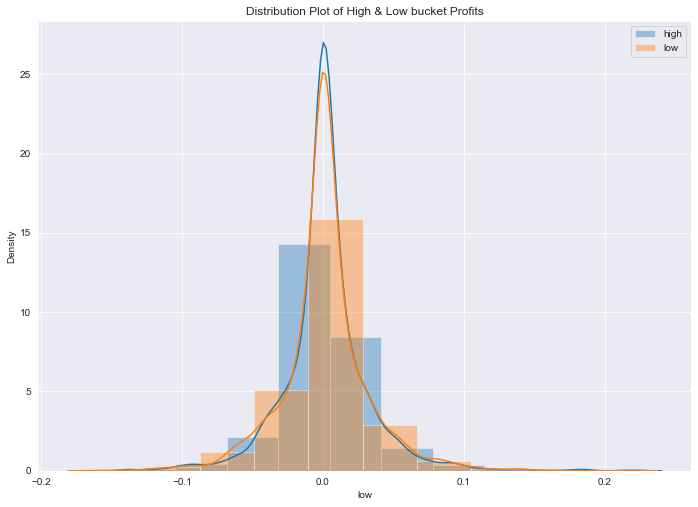

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.distplot(df1['high'],bins=10,label='high')
sns.distplot(df1['low'],bins=10,label='low')
plt.legend()
ax.set_title('Distribution Plot of High & Low bucket Profits')
plt.show()

In [44]:
confidence = 0.95
significance = 1 - confidence
critical_t = scipy.stats.norm.ppf(1 - (significance/2)) 

for col in df1.columns:

    upper_bound = df1[col].mean() + (critical_t * (df1[col].std())/ sqrt(len(df1[col])))

    lower_bound = df1[col].mean() - (critical_t * (df1[col].std())/ sqrt(len(df1[col])))

    print(f'Plausible range for High bucket: {lower_bound:.2%} to {upper_bound:,.2%}')

Plausible range for High bucket: 0.13% to 0.28%
Plausible range for High bucket: 0.07% to 0.23%


In [36]:
confidence = 0.95
significance = 1 - confidence
critical_t = scipy.stats.norm.ppf(1 - (significance/2)) 

x = (df1['high'].mean() - df1['low'].mean())

se = sqrt((df1['high'].var() / len(df1['high'])) + (df1['low'].var() / len(df1['low'])))

upper_bound = x + (critical_t * se)

lower_bound = x - (critical_t * se)
print('\n')
print(f'Plausible range for difference in means: {lower_bound:.2%} to {upper_bound:,.2%}')
print('\n\n')



Plausible range for difference in means: -0.05% to 0.17%





In [37]:
cm = sms.CompareMeans(sms.DescrStatsW(df1['high']), sms.DescrStatsW(df1['low']))
print(cm.tconfint_diff(usevar='unequal'))

(-0.0005223135203029838, 0.0017276546350826361)


In [ ]:
high = np.random.normal(2,1,1000) / 100
low = np.random.normal(0,1,1000) / 100

In [ ]:
high

In [46]:
def apply_rolling_mean(df, column = 'Bitcoin'):
    df['datetime'] = df.index
    df['day'] = df.datetime.apply(lambda x: str(x)[:-8] + '00:00:00')
    prev_day = None
    for i,r in df.iterrows():
        if prev_day != r['day']:
            prev_day = r['day']
            s = 0
            c = 0
            m = 0
        df.loc[i,column+'_mean'] = m
        if not np.isnan(r[column]):
            s += r[column]
            c += 1
            m = s/c
    return df

df1 = pd.read_csv('../Data Preprocessed/glove_1M_full_dates_hour.csv', index_col = 0)
df1 = apply_rolling_mean(df1, column = 'Bitcoin')
df1 = apply_rolling_mean(df1, column = 'Bitcoin_weighted')
df1.to_csv('glove_1M_full_dates_hour_rolling_mean.csv')

In [48]:
df1

,Open,Close,High,Low,Volume_(Currency),Bitcoin,Bitcoin_weighted,datetime,day,Bitcoin_mean,Bitcoin_weighted_mean
hour,,,,,,,,,,,
2017-08-01 00:00:00,2855.81,2825.92,2863.06,2823.00,5.761686e+05,0.551378,0.006434,2017-08-01 00:00:00,2017-08-01 00:00:00,0.000000,0.000000
2017-08-01 01:00:00,2823.01,2853.38,2860.02,2821.01,2.305357e+05,0.542253,0.003526,2017-08-01 01:00:00,2017-08-01 00:00:00,0.551378,0.006434
2017-08-01 02:00:00,2846.27,2841.60,2858.04,2837.31,4.106376e+05,0.558104,0.036610,2017-08-01 02:00:00,2017-08-01 00:00:00,0.546816,0.004980
2017-08-01 03:00:00,2841.84,2862.93,2863.88,2837.73,7.004128e+05,0.543261,0.019883,2017-08-01 03:00:00,2017-08-01 00:00:00,0.550579,0.015523
2017-08-01 04:00:00,2862.92,2872.03,2876.00,2848.11,7.303088e+05,0.548800,0.017027,2017-08-01 04:00:00,2017-08-01 00:00:00,0.548749,0.016613
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-22 18:00:00,3591.48,3590.67,3592.24,3575.93,8.446970e+05,0.536790,0.007699,2019-01-22 18:00:00,2019-01-22 00:00:00,0.510582,-0.013467
2019-01-22 19:00:00,3589.30,3579.28,3615.80,3573.00,2.241047e+06,0.526050,0.001949,2019-01-22 19:00:00,2019-01-22 00:00:00,0.511961,-0.012353
2019-01-22 20:00:00,3579.28,3585.51,3592.28,3579.28,5.052538e+05,0.539084,0.016331,2019-01-22 20:00:00,2019-01-22 00:00:00,0.512666,-0.011638
